In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()

In [5]:
df = pd.read_csv("iris.csv")

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
df2 = df[df["species"] != "Iris-versicolor"]

In [23]:
df2=df2[["sepal_length","sepal_width","species"]]

In [24]:
df2.head()

,sepal_length,sepal_width,species
0,5.1,3.5,Iris-setosa
1,4.9,3.0,Iris-setosa
2,4.7,3.2,Iris-setosa
3,4.6,3.1,Iris-setosa
4,5.0,3.6,Iris-setosa


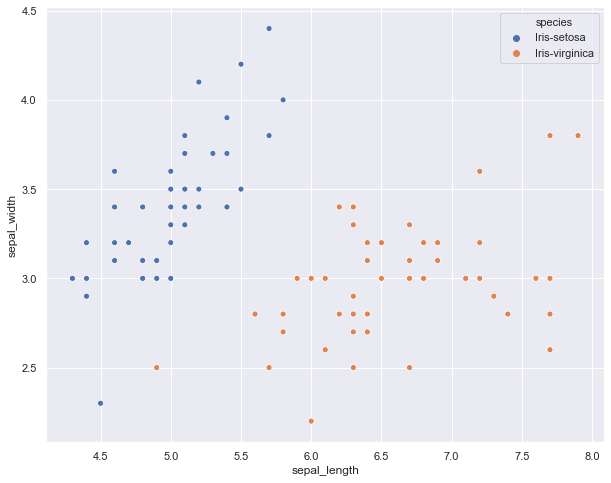

In [31]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df2, x="sepal_length",y="sepal_width", hue="species",)


In [32]:
X=df2[["sepal_length","sepal_width"]]
y=df2["species"]

In [51]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='rbf', C=1)
model.fit(X, y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [52]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

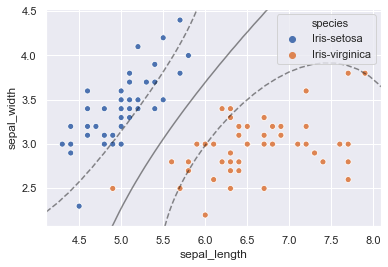

In [53]:
sns.scatterplot(data=df2, x="sepal_length",y="sepal_width", hue="species",)
plot_svc_decision_function(model)
plt.savefig("c1.png", dpi=300);

In [45]:
model2 = SVC(kernel='linear', C=0.01)
model2.fit(X, y)

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

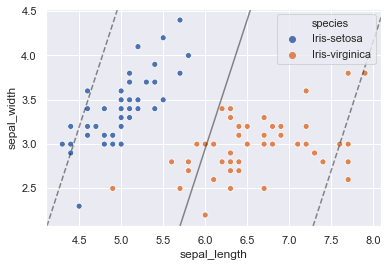

In [49]:
sns.scatterplot(data=df2, x="sepal_length",y="sepal_width", hue="species",)
plot_svc_decision_function(model2)
plt.savefig("c001.png", dpi=300);

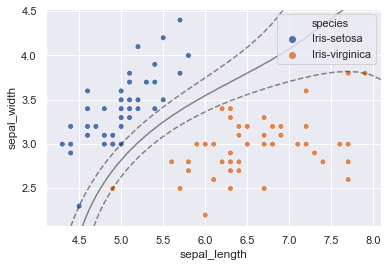

In [55]:
model3 = SVC(kernel='rbf', C=100)
model3.fit(X, y)
sns.scatterplot(data=df2, x="sepal_length",y="sepal_width", hue="species",)
plot_svc_decision_function(model3)
plt.savefig("c100.png", dpi=300);